# RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

The 3 main factors which are of focus here are

Recency- When was the last time the customer had purchased? Here Recency has been measured in days

Frequency-How many transactions did the customer make?

Monetory Value- How much money did the customer spend? Here we have taken the average money the customer had spent in each transaction.

<b>Objective</b>: To help a store target its customer based on their purchase behavior.

# Data Description

The data is about transactions in a retail store.
* InvoiceNo - Bill Number
* StockCode - SKU code of item 
* Description - Name of product
* Quantity - Quantity of product purchased
* Invoice Date - Date of purchase
* UnitPrice - Price of each product
* CustomerID - Customer ID of each customer 

Source : Open Source

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [331]:
df=pd.read_excel("C:/Users/tanmo/Downloads/Online Retail (1).xlsx")

In [332]:
print('No of instances before removing duplicates :',df.shape)
df.drop_duplicates
print('No of instances after removing duplicates :',df.shape)
df.head()

No of instances before removing duplicates : (51243, 7)
No of instances after removing duplicates : (51243, 7)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-11-06,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2012-09-28,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2005-10-25,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2009-07-09,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2013-01-25,3.39,17850.0


In [333]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,51243.000000,51243.000000,31217.000000
mean,7.798275,6.347769,15661.752282
std,59.413599,164.454515,1620.367145
min,-9360.000000,0.000000,12747.000000
25%,1.000000,1.250000,14437.000000
50%,2.000000,2.510000,15605.000000
75%,6.000000,4.250000,17198.000000
max,3114.000000,16888.020000,18283.000000


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    51243 non-null  object        
 1   StockCode    51243 non-null  object        
 2   Description  51085 non-null  object        
 3   Quantity     51243 non-null  int64         
 4   InvoiceDate  51243 non-null  datetime64[ns]
 5   UnitPrice    51243 non-null  float64       
 6   CustomerID   31217 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.7+ MB


In [335]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
dtype: object

In [336]:
#Removing records which have negative quantity
df_new = df[df['Quantity']>=0]
df_new.shape

(50297, 7)

In [337]:
#remove records where customerID are NA
df_new.dropna(subset=['CustomerID'],how='all',inplace=True)
df_new.shape

(30411, 7)

In [338]:
df_new['InvoiceDate'].sort_values()

7293    2005-01-02
24329   2005-01-02
17480   2005-01-02
17048   2005-01-04
34344   2005-01-06
           ...    
7725    2015-12-31
14003   2015-12-31
7606    2015-12-31
13912   2015-12-31
49277   2015-12-31
Name: InvoiceDate, Length: 30411, dtype: datetime64[ns]

In [339]:
#exploring the unique values of each attribute
print("Number of transactions: ", df_new['InvoiceNo'].nunique())
print("Number of customers:", df_new['CustomerID'].nunique())
print("Number of Product:", df_new['Description'].nunique())

Number of transactions:  1593
Number of customers: 938
Number of Product: 2480


# RFM Analysis

In [340]:
print(df_new['InvoiceDate'].max())
print(df_new['InvoiceDate'].min())

2015-12-31 00:00:00
2005-01-02 00:00:00


In [341]:
from datetime import datetime
df_new['InvoiceDate'] = pd.DatetimeIndex(df_new['InvoiceDate']).date

In [342]:
df_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID'],
      dtype='object')

In [343]:
df_new.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
dtype: object

In [344]:
df_new['month'] = pd.to_datetime(df_new['InvoiceDate']).dt.month
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-11-06,2.55,17850.0,11
1,536365,71053,WHITE METAL LANTERN,6,2012-09-28,3.39,17850.0,9
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2005-10-25,2.75,17850.0,10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2009-07-09,3.39,17850.0,7
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2013-01-25,3.39,17850.0,1
...,...,...,...,...,...,...,...,...
51238,540957,21245,GREEN POLKADOT PLATE,3,2011-11-12,1.69,15311.0,11
51239,540957,21240,BLUE POLKADOT CUP,4,2013-11-15,0.85,15311.0,11
51240,540957,21239,PINK POLKADOT CUP,4,2014-12-23,0.85,15311.0,12
51241,540957,21238,RED RETROSPOT CUP,4,2015-05-28,0.85,15311.0,5


In [345]:
df_new['year'] = pd.to_datetime(df_new['InvoiceDate']).dt.year
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-11-06,2.55,17850.0,11,2009
1,536365,71053,WHITE METAL LANTERN,6,2012-09-28,3.39,17850.0,9,2012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2005-10-25,2.75,17850.0,10,2005
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2009-07-09,3.39,17850.0,7,2009
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2013-01-25,3.39,17850.0,1,2013
...,...,...,...,...,...,...,...,...,...
51238,540957,21245,GREEN POLKADOT PLATE,3,2011-11-12,1.69,15311.0,11,2011
51239,540957,21240,BLUE POLKADOT CUP,4,2013-11-15,0.85,15311.0,11,2013
51240,540957,21239,PINK POLKADOT CUP,4,2014-12-23,0.85,15311.0,12,2014
51241,540957,21238,RED RETROSPOT CUP,4,2015-05-28,0.85,15311.0,5,2015


# Recency

In [346]:
recency= df_new.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency.columns = ['CustomerID','LastPurshaceDate']
recency.head()

,CustomerID,LastPurshaceDate
0,12747.0,2015-12-19
1,12748.0,2015-12-31
2,12826.0,2012-08-31
3,12829.0,2015-10-31
4,12838.0,2014-04-19


In [347]:
import datetime as dt
present = dt.date(2016,1,1)

In [348]:
recency.columns

Index(['CustomerID', 'LastPurshaceDate'], dtype='object')

In [349]:
#calculate recency in days
recency['Recency'] =recency['LastPurshaceDate'].apply(lambda x: (present- x).days)

In [350]:
recency[['Recency','CustomerID']].head()

,Recency,CustomerID
0,13,12747.0
1,1,12748.0
2,1218,12826.0
3,62,12829.0
4,622,12838.0


In [351]:
recency.columns

Index(['CustomerID', 'LastPurshaceDate', 'Recency'], dtype='object')

In [352]:
#Dropping LastPurchaseDate as we don't need it anymore
recency.drop(['LastPurshaceDate'],axis=1,inplace=True)

<AxesSubplot: xlabel='Recency', ylabel='Count'>

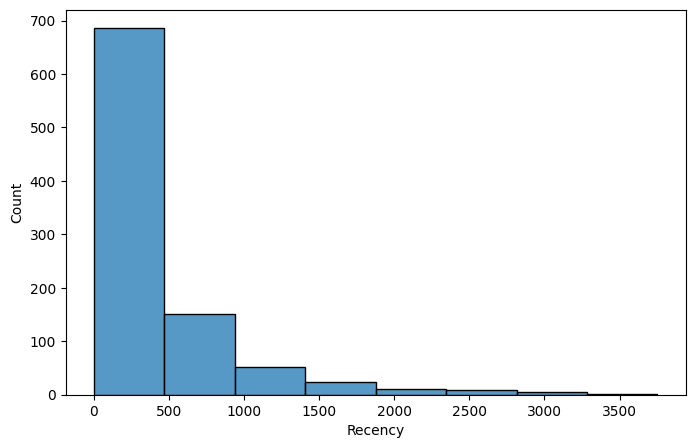

In [353]:
plt.figure(figsize=(8,5))
sns.histplot(recency.Recency,bins=8)

We can obsereve that there are quite few customers who have visited the store beyond 1.5 yrs and has not come back.

# Frequency

In [354]:
df_new.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
frequency = df_new.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12747.0,2
1,12748.0,37
2,12826.0,1
3,12829.0,2
4,12838.0,1


<AxesSubplot: xlabel='Frequency', ylabel='Count'>

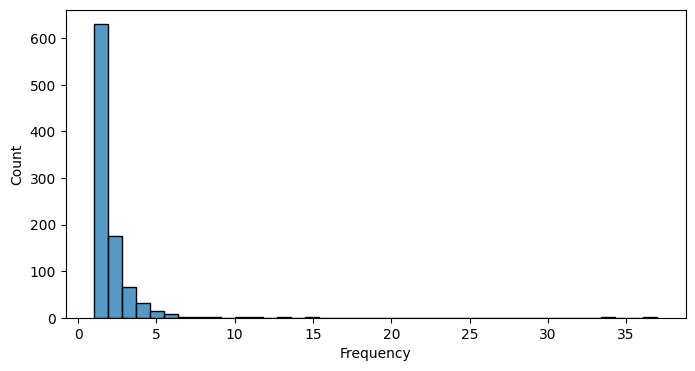

In [355]:
plt.figure(figsize=(8,4))
sns.histplot(frequency['Frequency'],bins=40)

We can see from the above graph that most of the customers are frequent visitors to the store.

In [356]:
frequency[['CustomerID','Frequency']].head(5)

,CustomerID,Frequency
0,12747.0,2
1,12748.0,37
2,12826.0,1
3,12829.0,2
4,12838.0,1


# Monetary

In [357]:
df_new['TotalCost'] = df_new['Quantity'] * df_new['UnitPrice']

In [358]:
monetary =df_new.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'mean'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12747.0,62.900000
1,12748.0,12.884595
2,12826.0,17.700000
3,12829.0,47.900000
4,12838.0,5.500000


<AxesSubplot: xlabel='Monetary', ylabel='Count'>

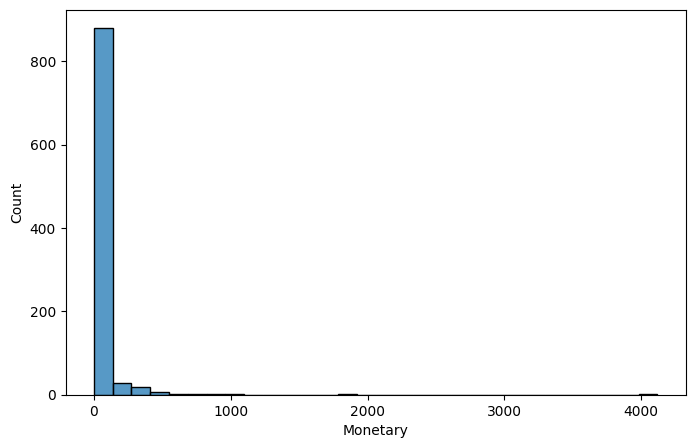

In [359]:
plt.figure(figsize=(8,5))
sns.histplot(monetary['Monetary'],bins=30)

We can see from the above graph that high bill value customers are quite less.

# Lets see how RFM works with Date Field and if we can find any interesting facts

In [360]:
df1=recency.merge(frequency,on='CustomerID')

In [361]:
df2=monetary.merge(df1,on='CustomerID')

In [362]:
df2.head()

,CustomerID,Monetary,Recency,Frequency
0,12747.0,62.900000,13,2
1,12748.0,12.884595,1,37
2,12826.0,17.700000,1218,1
3,12829.0,47.900000,62,2
4,12838.0,5.500000,622,1


In [363]:
df3=df2.merge(df_new,on='CustomerID',how='outer')

In [364]:
df3.columns

Index(['CustomerID', 'Monetary', 'Recency', 'Frequency', 'InvoiceNo',
       'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'month', 'year', 'TotalCost'],
      dtype='object')

<AxesSubplot: xlabel='month', ylabel='Frequency'>

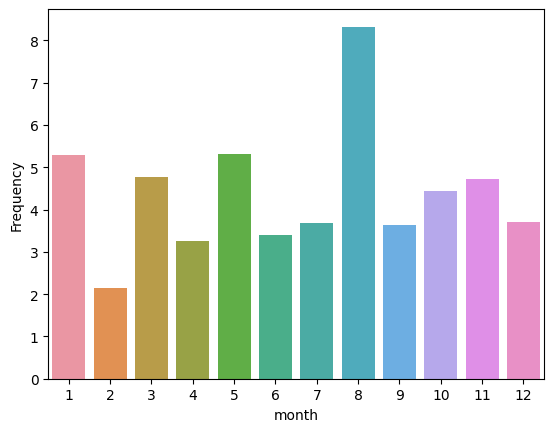

In [365]:
sns.barplot(data=df3,x='month',y='Frequency',ci=None)

From the above chart we could see, in the month of August have higest frequency than other months

<AxesSubplot: xlabel='month', ylabel='Monetary'>

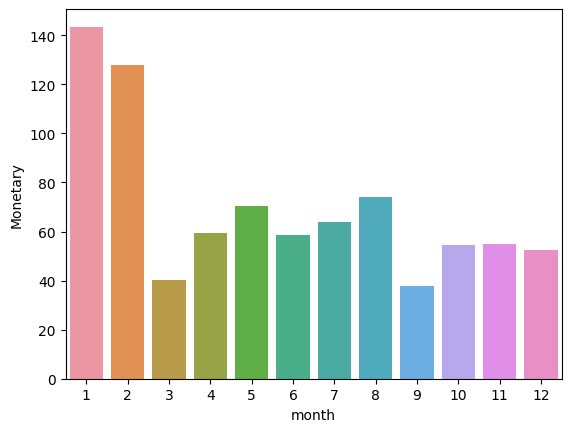

In [366]:
sns.barplot(data=df3,x='month',y='Monetary',ci=None)

In the month of Jan and February customer spent more.

In [367]:
df3['weekday'] = pd.to_datetime(df3['InvoiceDate']).dt.dayofweek
df3['weekend'] = df3['weekday'].isin([5,6])

In [368]:
df3['weekday'].unique()

array([5, 2, 4, 3, 6, 1, 0], dtype=int64)

In [369]:
df3['weekend'].unique()

array([ True, False])

<AxesSubplot: xlabel='weekend', ylabel='Monetary'>

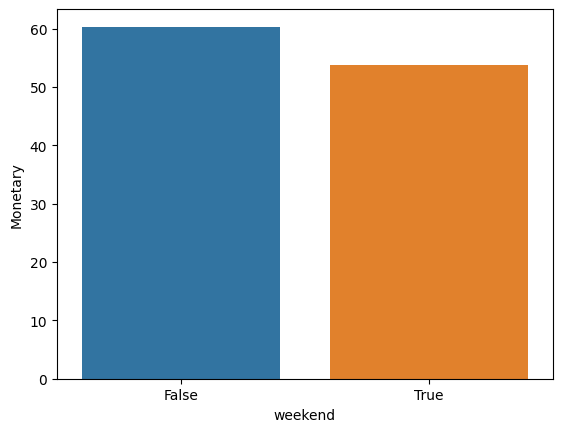

In [370]:
sns.barplot(x=df3['weekend'],y=df3['Monetary'], ci=False)

In [371]:
weekday_monetary = df3.loc[df3['weekday'].isin([0, 1, 2, 3, 4]), 'Monetary']
weekend_monetary = df3.loc[df3['weekday'].isin([5, 6]), 'Monetary']
print("Mean Monetary value (Weekdays):", weekday_monetary.mean())
print("Mean Monetary value (Weekends):", weekend_monetary.mean())

Mean Monetary value (Weekdays): 60.30900385119609
Mean Monetary value (Weekends): 53.727574294615906


People on average spent more on weekdays more than weekend

<AxesSubplot: xlabel='weekend', ylabel='Frequency'>

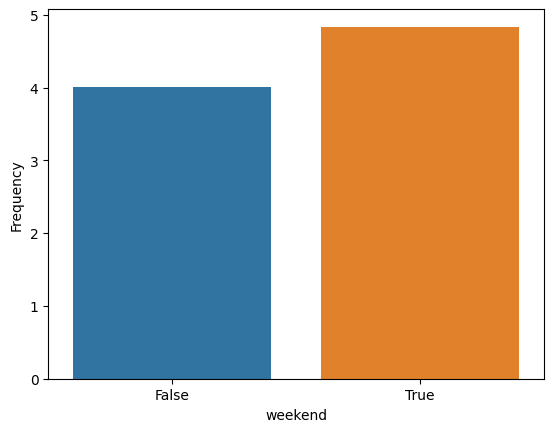

In [372]:
sns.barplot(x=df3['weekend'],y=df3['Frequency'],ci=False)

<AxesSubplot: xlabel='weekday', ylabel='Monetary'>

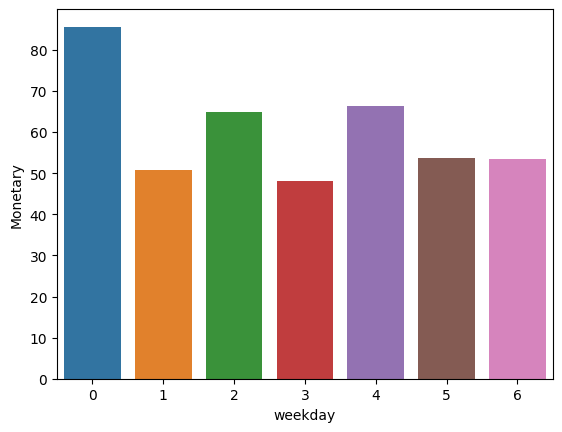

In [373]:
sns.barplot(x=df3['weekday'],y=df3['Monetary'],ci=False)

In [374]:
weekday_monetary_mean = df3.groupby('weekday')['Monetary'].mean()
print(weekday_monetary_mean)

weekday
0    85.629343
1    50.688898
2    64.764324
3    48.022040
4    66.244796
5    53.800659
6    53.332254
Name: Monetary, dtype: float64


Customers on an avgerage spent more on Monday.

<AxesSubplot: xlabel='weekday', ylabel='Frequency'>

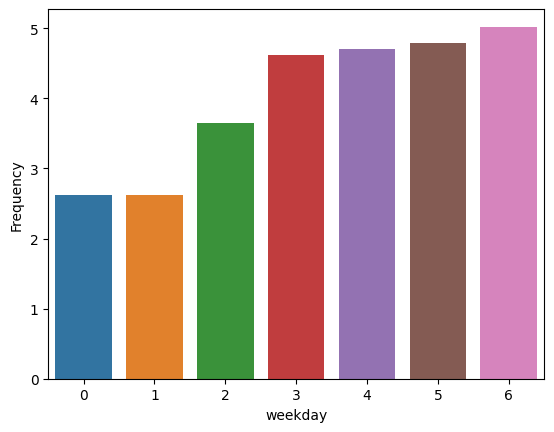

In [375]:
sns.barplot(x=df3['weekday'],y=df3['Frequency'],ci=False)

In [376]:
weekday_frequency_mean = df3.groupby('weekday')['Frequency'].mean()
print(weekday_frequency_mean)


weekday
0    2.615385
1    2.625731
2    3.643805
3    4.621324
4    4.707692
5    4.794118
6    5.022727
Name: Frequency, dtype: float64


People visting the store are more on Weekends.

# Relationship with Recency,Frequency,Monetary

<AxesSubplot: xlabel='Recency', ylabel='Frequency'>

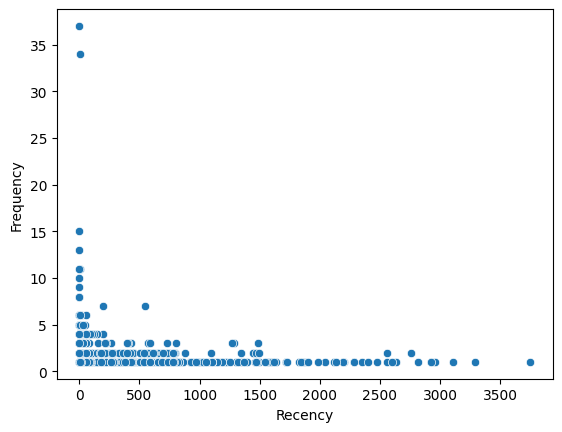

In [377]:
sns.scatterplot(df2,x='Recency',y='Frequency')

From the above chart we could infer that recent visitors are more frequent buyers.

<AxesSubplot: xlabel='Frequency', ylabel='Monetary'>

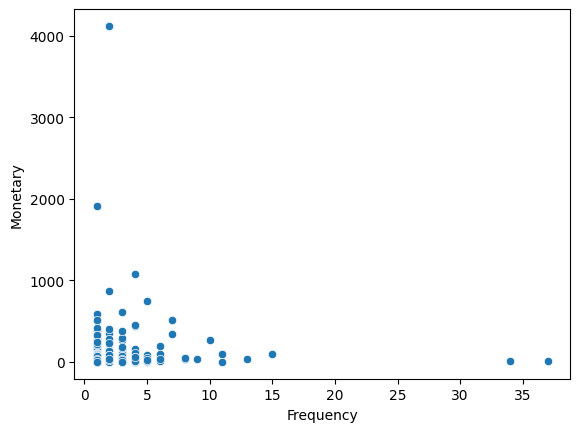

In [378]:
sns.scatterplot(df2,x='Frequency',y='Monetary')

From the above chart we could infer that less frequent people spent more monetary value.

<AxesSubplot: xlabel='Recency', ylabel='Monetary'>

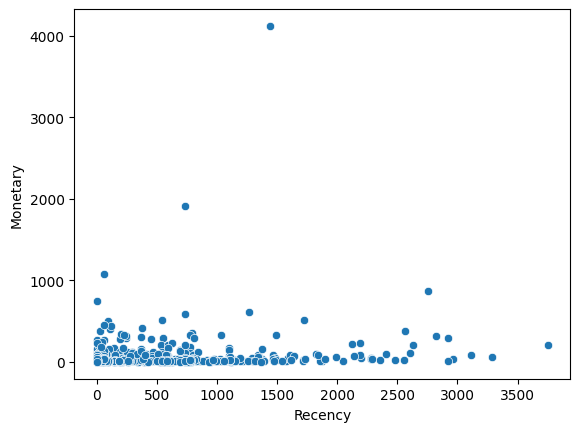

In [379]:
sns.scatterplot(df2,x='Recency',y='Monetary')

# Recency Bucket

In [380]:
percentiles = [ 0.33, 0.66]
recency_percentiles = df2['Recency'].quantile(percentiles)
print(recency_percentiles[0.33])
print(recency_percentiles[0.66])

11.420000000000073
320.52000000000044


In [381]:
def R_Score(x):
    if x['Recency'] <=11:
        recency = 3
    elif x['Recency'] >11  and x['Recency'] <=321:
        recency = 2 
    else:
        recency = 1
    return recency

In [382]:
df2['R_Score'] = df2.apply(R_Score,axis=1)

In [383]:
df2.head()

,CustomerID,Monetary,Recency,Frequency,R_Score
0,12747.0,62.900000,13,2,2
1,12748.0,12.884595,1,37,3
2,12826.0,17.700000,1218,1,1
3,12829.0,47.900000,62,2,2
4,12838.0,5.500000,622,1,1


In [384]:
df2['R_Score'].unique()

array([2, 3, 1], dtype=int64)

# Frequency Bucket

In [385]:
percentiles = [0.40, 0.80]
Frequency_Percentile = df2['Frequency'].quantile(percentiles)
print(Frequency_Percentile[0.40])
print(Frequency_Percentile[0.80])

1.0
2.0


In [386]:
def F_Score(x):
    if x['Frequency'] <= 1:
        frequency = 1
    elif x['Frequency'] >1  and x['Frequency'] <= 2:
        frequency = 2
    else:
        frequency = 3
    return frequency

In [387]:
df2['F_Score'] = df2.apply(F_Score,axis=1)

In [388]:
df2[['CustomerID','R_Score','F_Score']].head(5)

,CustomerID,R_Score,F_Score
0,12747.0,2,2
1,12748.0,3,3
2,12826.0,1,1
3,12829.0,2,2
4,12838.0,1,1


# Monetary Bucket

In [389]:
percentiles = [0.33,0.66]
Monetary_Percentile = df2['Monetary'].quantile(percentiles)
print(Monetary_Percentile[0.33])
print(Monetary_Percentile[0.66])

13.200000000000001
24.721000000000004


In [390]:
def M_Score(x):
    if x['Monetary'] <=13:
        Monetary = 1
    elif x['Monetary'] >13  and x['Monetary'] <=25:
        Monetary = 2
    else:
        Monetary = 3
    return Monetary

In [391]:
df2['M_Score'] = df2.apply(M_Score,axis=1)

In [392]:
df2[['CustomerID','R_Score','F_Score','M_Score']].head(20)

,CustomerID,R_Score,F_Score,M_Score
0,12747.0,2,2,3
1,12748.0,3,3,1
2,12826.0,1,1,2
3,12829.0,2,2,3
4,12838.0,1,1,1
5,12839.0,3,2,3
6,12841.0,3,3,1
7,12855.0,1,1,2
8,12867.0,2,1,1
9,12868.0,2,1,3


# RFM CALCULATION

In [393]:
df2['RFMScore'] = df2.R_Score.map(str) \
                            + df2.F_Score.map(str) \
                            + df2.M_Score.map(str)
df2.head(15)

,CustomerID,Monetary,Recency,Frequency,R_Score,F_Score,M_Score,RFMScore
0,12747.0,62.900000,13,2,2,2,3,223
1,12748.0,12.884595,1,37,3,3,1,331
2,12826.0,17.700000,1218,1,1,1,2,112
3,12829.0,47.900000,62,2,2,2,3,223
4,12838.0,5.500000,622,1,1,1,1,111
5,12839.0,30.575000,2,2,3,2,3,323
6,12841.0,7.950000,6,3,3,3,1,331
7,12855.0,17.700000,1875,1,1,1,2,112
8,12867.0,10.500000,57,1,2,1,1,211
9,12868.0,29.700000,36,1,2,1,3,213


# Segmentation

In [394]:
print("Champions: ",len(df2[df2['RFMScore']=='333']))
print('Loyal Customers: ',len(df2[df2['RFMScore']=='233']) + len(df2[df2['RFMScore']=='332']))
print('Potential Loyalists: ',len(df2[df2['RFMScore']=='133'])  + len(df2[df2['RFMScore']=='232']))
print('At Risk: ',len(df2[df2['RFMScore']=='113'])  + len(df2[df2['RFMScore']=='213'])+ len(df2[df2['RFMScore']=='313']))
print("Can't lose them: ", len(df2[df2['RFMScore']=='111']))
print('Hibernating: ',len(df2[df2['RFMScore']=='121'])  + len(df2[df2['RFMScore']=='221'])+ len(df2[df2['RFMScore']=='321']))
print("Lost Customers: ",len(df2[df2['RFMScore']=='112'])  + len(df2[df2['RFMScore']=='212'])+ len(df2[df2['RFMScore']=='312']))
print('New Customers:', len(df2[df2['RFMScore'] == '311']) + len(df2[df2['RFMScore'] == '211']) + len(df2[df2['RFMScore'] == '111']))

Champions:  28
Loyal Customers:  48
Potential Loyalists:  18
At Risk:  175
Can't lose them:  59
Hibernating:  46
Lost Customers:  232
New Customers: 223


Based on these segments the store can target those specific customers and formulate ad campaigns or marketing accordingly. 